In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from datetime import datetime

In [2]:
#load data
NF_df=pd.read_csv("C:/Users/debap/Downloads/Netflix_Customer _Subscription.csv")
#view the first five rows of the dataset
NF_df.head()

,Time Period,Subscribers
0,01-04-2013,34240000
1,01-07-2013,35640000
2,01-10-2013,38010000
3,01-01-2014,41430000
4,01-04-2014,46130000


In [3]:
#Exploratory data analysis
# check the dataset type
NF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  43 non-null     object
 1   Subscribers  43 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 816.0+ bytes


In [4]:
#find the shape of the dataset
NF_df.shape

(43, 2)

In [5]:
#check for missing values
NF_df.isnull().sum()

Time Period    0
Subscribers    0
dtype: int64

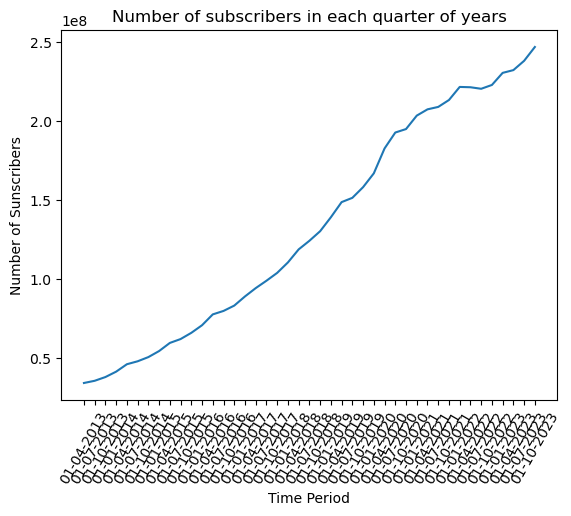

In [6]:
# plot the data
plt.plot(NF_df['Time Period'],NF_df['Subscribers'])
plt.xticks(NF_df['Time Period'],rotation=60)
plt.xlabel("Time Period")
plt.ylabel("Number of Sunscribers")
plt.title("Number of subscribers in each quarter of years")
plt.show()

In [7]:
# Convert Time period to datetime format
NF_df['Time Period'] = pd.to_datetime(NF_df['Time Period'], format='%d-%m-%Y')
# Create a continuous time index
NF_df['TimeIndex'] = np.arange(len(NF_df))
# Inspect the data
NF_df.head()

,Time Period,Subscribers,TimeIndex
0,2013-04-01,34240000,0
1,2013-07-01,35640000,1
2,2013-10-01,38010000,2
3,2014-01-01,41430000,3
4,2014-04-01,46130000,4


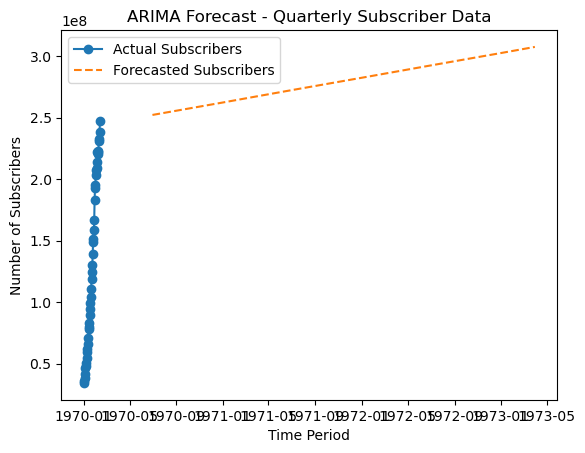

In [14]:
#Forecasting
# Fit the ARIMA model
model = ARIMA(NF_df['Subscribers'], order=(1,1,1))
model_fit = model.fit()

# Forecast future values
forecast_steps = 12  # Number of quarters to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(NF_df.index, NF_df['Subscribers'], label='Actual Subscribers', marker='o')
plt.plot(pd.date_range(start=NF_df.index[-1], periods=forecast_steps+1, freq='Q')[1:], forecast, label='Forecasted Subscribers', linestyle='--')
plt.xlabel('Time Period')
plt.ylabel('Number of Subscribers')
plt.title('ARIMA Forecast - Quarterly Subscriber Data')
plt.legend()
plt.show()

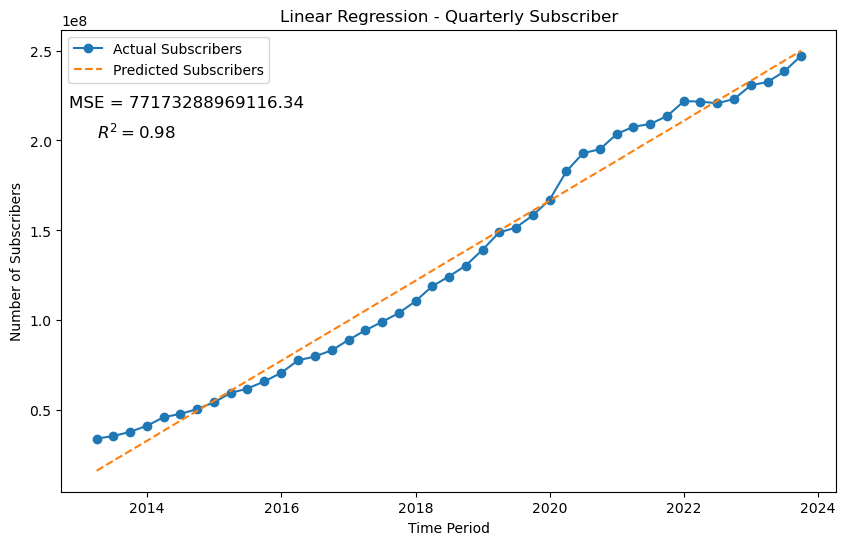

In [12]:
# Extract the predictor and response variables
X = NF_df['TimeIndex'].values.reshape(-1, 1)
y = NF_df['Subscribers'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients
m = model.coef_[0]
c = model.intercept_

# Predicted subscribers
predicted_subscribers = model.predict(X)

# Calculate R^2 value
r2 = model.score(X, y)

# Calculate MSE
mse = mean_squared_error(y, predicted_subscribers)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(NF_df['Time Period'], NF_df['Subscribers'], label='Actual Subscribers', marker='o')
plt.plot(NF_df['Time Period'], predicted_subscribers, label='Predicted Subscribers', linestyle='--')
plt.xlabel('Time Period')
plt.ylabel('Number of Subscribers')
plt.title('Linear Regression - Quarterly Subscriber')
plt.legend()
plt.figtext(0.2, 0.7, f'$R^2 = {r2:.2f}$', fontsize=12, ha='center')
plt.figtext(0.25, 0.75, f'MSE = {mse:.2f}', fontsize=12, ha='center')
plt.show()

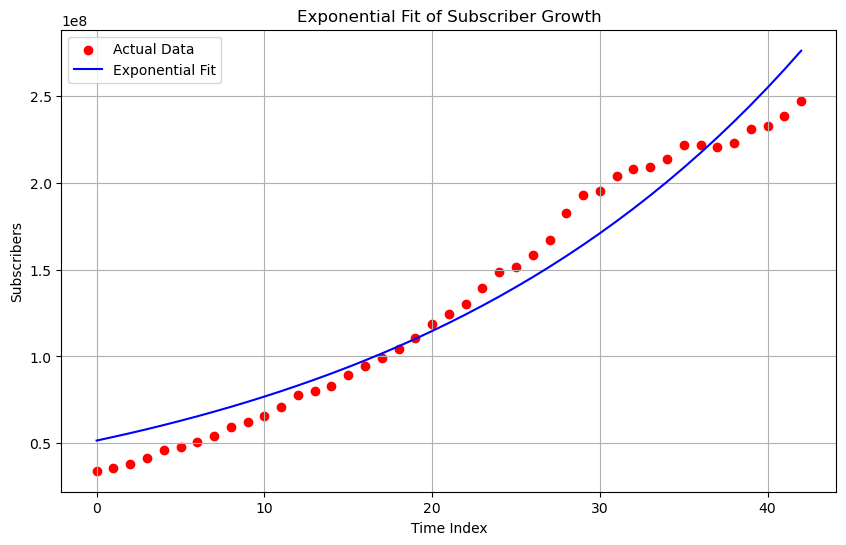

Optimal S0 (Initial Subscribers): 51593479.73957804
Optimal k (Growth Rate): 0.039926870769966316


In [10]:
# Define the exponential function
def exponential_model(t, S0, k):
    return S0 * np.exp(k * t)
# Extract the data for fitting
t_data = NF_df['TimeIndex']
S_data = NF_df['Subscribers']

# Fit the exponential model to the data
popt, pcov = curve_fit(exponential_model, t_data, S_data, p0=(S_data[0], 0.1))

# Get the optimal values for S0 and k
S0_opt, k_opt = popt

# Generate fitted values
S_fitted = exponential_model(t_data, S0_opt, k_opt)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(t_data, S_data, label='Actual Data', color='red')
plt.plot(t_data, S_fitted, label='Exponential Fit', color='blue')
plt.xlabel('Time Index')
plt.ylabel('Subscribers')
plt.title('Exponential Fit of Subscriber Growth')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal parameters
print(f"Optimal S0 (Initial Subscribers): {S0_opt}")
print(f"Optimal k (Growth Rate): {k_opt}")

Predicted profit at time index 43: 28714065295.037823
Predicted profit at time index 44: 29884048953.676968
Predicted profit at time index 45: 31101691502.699574
Predicted profit at time index 46: 32368934310.95794
Predicted profit at time index 47: 33687797828.31086


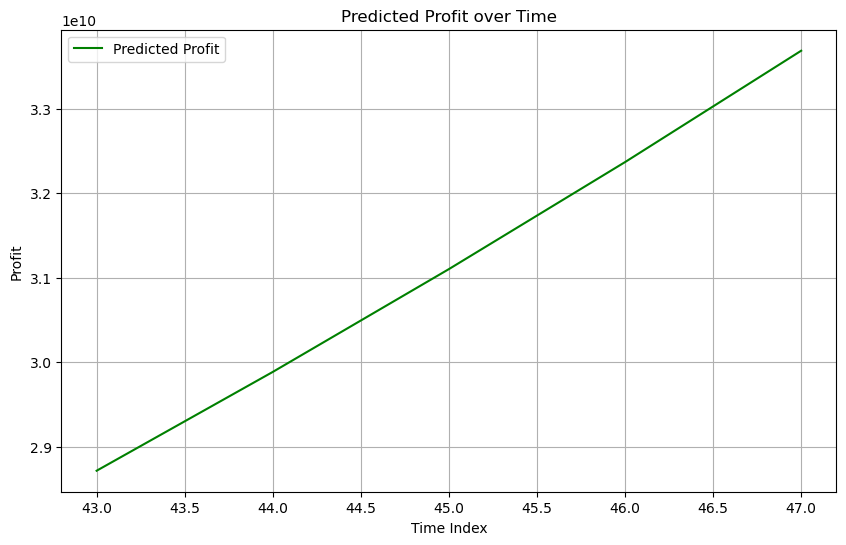

In [13]:
# Define the financial equation
def profit(t, m, c):
    return m * exponential_model(t, S0_opt, k_opt) - c

# Parameters
subscription_fee = 100  # Subscription fee taken as Rs.100 per month
production_cost = 8000000  # Production cost taken as 8,000,000 per month

# Predict profit for the next 5 time periods
future_t = np.arange(43,48)
predicted_profit = profit(future_t, subscription_fee, production_cost)

# Print the predicted profits
for t, p in zip(future_t, predicted_profit):
    print(f"Predicted profit at time index {t}: {p}")

# Plot the predicted profits
plt.figure(figsize=(10, 6))
plt.plot(future_t,predicted_profit,label='Predicted Profit',color='green')
plt.xlabel('Time Index')
plt.ylabel('Profit')
plt.title('Predicted Profit over Time')
plt.legend()
plt.grid(True)
plt.show()